In [3]:
import requests
from config import weather_api_key
from datetime import datetime
import numpy as np
from citipy import citipy
import pandas as pd

In [4]:
# Create an empty list to hold the weather data
city_data = []
# Print th beginning of the logging
print("Beginning Data Retrieval  ")
print("--------------------------")

Beginning Data Retrieval  
--------------------------


In [5]:
# Create counters
record_count = 1
set_count = 1

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=08edac57d74f5725da3629ed8059ffb2'

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add coordinates from tuple to list
coordinates = list(lat_lngs)

# Create a list for holding cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If city is not in list, add it to list
    if city not in cities:
        cities.append(city)
# Print count of cities to confirm sufficient count
len(cities)

617

In [9]:
# Loop through all the cities in the list using the enumerate method
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + '&q=' + city.replace(' ','+')

    # Log the URL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}' + '--URL: ' + city_url)
    # Increase the record count
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    

pi.openweathermap.org/data/2.5/weather?units=Imperial&APPID=08edac57d74f5725da3629ed8059ffb2&q=gorontalo
Processing Record 45 of Set 10 | yerbogachen--URL: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=08edac57d74f5725da3629ed8059ffb2&q=yerbogachen
Processing Record 46 of Set 10 | fare--URL: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=08edac57d74f5725da3629ed8059ffb2&q=fare
Processing Record 47 of Set 10 | kieta--URL: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=08edac57d74f5725da3629ed8059ffb2&q=kieta
Processing Record 48 of Set 10 | wilmington--URL: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=08edac57d74f5725da3629ed8059ffb2&q=wilmington
Processing Record 49 of Set 10 | khartoum--URL: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=08edac57d74f5725da3629ed8059ffb2&q=khartoum
Processing Record 50 of Set 10 | adeje--URL: http://api.openweathermap.org/data/2.5/weather?units=I

In [10]:
len(city_data)

570

In [11]:
# Convert city data array into DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Airai,-8.93,125.41,60.85,82,95,1.16,TL,2020-10-15 18:18:57
1,Georgetown,5.41,100.34,80.60,88,20,1.12,MY,2020-10-15 18:14:51
2,Nome,64.50,-165.41,35.60,93,90,17.22,US,2020-10-15 18:19:06
3,Kihei,20.79,-156.47,78.01,73,1,0.78,US,2020-10-15 18:22:19
4,Yartsevo,55.07,32.70,48.49,82,97,6.15,RU,2020-10-15 18:22:19
5,Tura,25.52,90.22,73.67,94,0,1.83,IN,2020-10-15 18:22:19
6,Mataura,-46.19,168.86,32.29,91,59,3.74,NZ,2020-10-15 18:18:37
7,Feijo,-8.16,-70.35,85.57,61,78,3.98,BR,2020-10-15 18:22:19
8,Bluff,-46.60,168.33,45.18,56,52,21.47,NZ,2020-10-15 18:18:40
9,Hithadhoo,-0.60,73.08,82.69,75,68,16.58,MV,2020-10-15 18:18:51


In [15]:
# Rearrange columns into a more logical order
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

In [17]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Airai,TL,2020-10-15 18:18:57,-8.93,125.41,60.85,82,95,1.16
1,Georgetown,MY,2020-10-15 18:14:51,5.41,100.34,80.60,88,20,1.12
2,Nome,US,2020-10-15 18:19:06,64.50,-165.41,35.60,93,90,17.22
3,Kihei,US,2020-10-15 18:22:19,20.79,-156.47,78.01,73,1,0.78
4,Yartsevo,RU,2020-10-15 18:22:19,55.07,32.70,48.49,82,97,6.15


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [24]:
import time
today = time.strftime('%x')
today

'10/15/20'

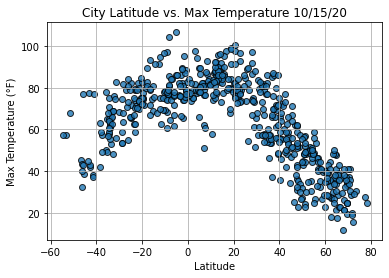

In [27]:
import matplotlib.pyplot as plt 
# Create the scatter plot for lat vs. max temp
plt.scatter(lats,
            max_temps,
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')
# Add the trimmings
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (°F)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('weather_data/Fig1.png')
plt.show()

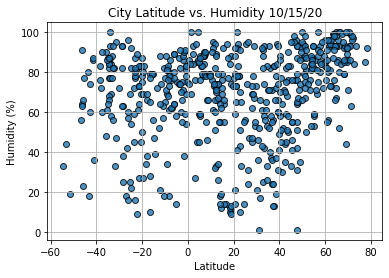

In [29]:
# Create the scatter plot for lat vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')
# Add the trimmings
plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('weather_data/Fig2.png')
plt.show()

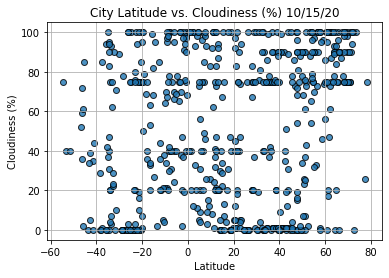

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

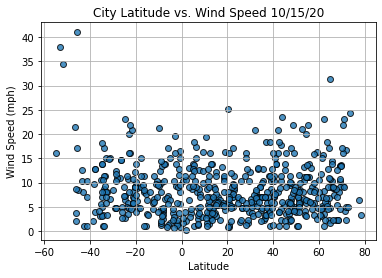

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()